C:\Users\dines\AppData\Local\Temp\ipykernel_15708\943522622.py:7: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
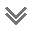

In [39]:
# pip install requests
# pip install beautifulsoup4

from bs4 import BeautifulSoup
import requests
# fetching the html code
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
codes = BeautifulSoup(soup.text, "lxml")
codes

In [40]:
# selecting only table tag
data = []
table_code = codes.table
tags = table_code.find_all('tr')
for i in tags:
    data.append(i.text.split('\n'))
    
data

[['',
  '#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['',
  '',
  '',
  'North America',
  '',
  '127,451,083',
  '',
  '1,641,841',
  '',
  '123,331,630',
  '',
  '2,477,612',
  '6,068',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  'Asia',
  '',
  '220,001,607',
  '+8',
  '1,548,709',
  '',
  '203,116,615',
  '+48,203',
  '15,336,283',
  '15,176',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  'Europe',
  '',
  '249,773,060',
  '',
  '2,069,295',
  

In [41]:
# cleaning the data
final_data = []
for i in data:
    if i[1] != '':
        final_data.append(i[1:])
final_data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '107,740,749',
  '',
  '1,172,148                                ',
  '',
  '105,795,651',
  '',
  '772,950',
  '902',
  '321,801',
  '3,501',
  '1,181,275,512',
  '3,528,246',
  '334,805,269 ',
  'North America',
  '',
  '32860',
  '',
  '',
  '2,309',
  ''],
 ['2',
  'India',
  '44,996,335',
  '',
  '531,922                                ',
  '',
  '44,462,961',
  '',
  '1,452',
  'N/A',
  '31,989',
  '378',
  '930,797,975',
  '661,721',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6442',
  '',
  '',
  '1',
  ''],
 ['3',
  'France',
  '40,138,560',
  '',

In [42]:
# writing the list data
import csv
file = open('covid.csv','w')
x = csv.writer(file)
x.writerows(final_data)
file.close()

In [43]:
# importing and viewing using pandas
import pandas as pd
df = pd.read_csv('covid.csv',encoding = 'latin')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
0,1,USA,"107,740,749",NaN,"1,172,148",NaN,"105,795,651",NaN,"772,950",902.0,...,"3,528,246","334,805,269",North America,NaN,32860,NaN,NaN,"2,309",NaN,NaN
1,2,India,"44,996,335",NaN,"531,922",NaN,"44,462,961",NaN,"1,452",NaN,...,"661,721","1,406,631,776",Asia,NaN,"312,6442",NaN,NaN,1,NaN,NaN
2,3,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869.0,...,"4,139,547","65,584,518",Europe,NaN,23910,NaN,NaN,NaN,NaN,NaN
3,4,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,...,"1,458,359","83,883,596",Europe,NaN,24811,NaN,NaN,164,NaN,NaN
4,5,Brazil,"37,750,389",NaN,"705,054",NaN,"36,249,161",NaN,"796,174",NaN,...,"296,146","215,353,593",South America,NaN,63053,NaN,NaN,"3,697",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,Tokelau,80,NaN,,NaN,NaN,NaN,80,NaN,...,NaN,"1,378",Australia/Oceania,NaN,17,NaN,NaN,"58,055",NaN,NaN
227,228,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,...,NaN,799,Europe,NaN,28,NaN,NaN,NaN,NaN,NaN
228,229,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,...,NaN,"626,161",Africa,NaN,"62,616626,161",NaN,NaN,NaN,NaN,NaN
229,230,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df = df[['Country,Other','TotalCases','TotalDeaths','TotalRecovered','ActiveCases']]
df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,USA,"107,740,749","1,172,148","105,795,651","772,950"
1,India,"44,996,335","531,922","44,462,961","1,452"
2,France,"40,138,560","167,642","39,970,918",0
3,Germany,"38,428,685","174,352","38,240,600","13,733"
4,Brazil,"37,750,389","705,054","36,249,161","796,174"
...,...,...,...,...,...
226,Tokelau,80,,NaN,80
227,Vatican City,29,,29,0
228,Western Sahara,10,1,9,0
229,MS Zaandam,9,2,7,0


In [45]:
df = df.dropna()
df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,USA,"107,740,749","1,172,148","105,795,651","772,950"
1,India,"44,996,335","531,922","44,462,961","1,452"
2,France,"40,138,560","167,642","39,970,918",0
3,Germany,"38,428,685","174,352","38,240,600","13,733"
4,Brazil,"37,750,389","705,054","36,249,161","796,174"
...,...,...,...,...,...
225,Diamond Princess,712,13,699,0
227,Vatican City,29,,29,0
228,Western Sahara,10,1,9,0
229,MS Zaandam,9,2,7,0


In [46]:
df = df[df['TotalDeaths'] != ' ']
df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,USA,"107,740,749","1,172,148","105,795,651","772,950"
1,India,"44,996,335","531,922","44,462,961","1,452"
2,France,"40,138,560","167,642","39,970,918",0
3,Germany,"38,428,685","174,352","38,240,600","13,733"
4,Brazil,"37,750,389","705,054","36,249,161","796,174"
...,...,...,...,...,...
223,Montserrat,"1,403",8,"1,376",19
225,Diamond Princess,712,13,699,0
228,Western Sahara,10,1,9,0
229,MS Zaandam,9,2,7,0


In [47]:
df['TotalCases'] = [int(i.replace(',','')) for i in df['TotalCases']]
df['TotalDeaths'] = [int(i.replace(',','')) for i in df['TotalDeaths']]
df['TotalRecovered'] = [int(i.replace(',','')) for i in df['TotalRecovered']]
df['ActiveCases'] = [int(i.replace(',','')) for i in df['ActiveCases']]
df

C:\Users\dines\AppData\Local\Temp\ipykernel_15708\1554293319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCases'] = [int(i.replace(',','')) for i in df['TotalCases']]
C:\Users\dines\AppData\Local\Temp\ipykernel_15708\1554293319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalDeaths'] = [int(i.replace(',','')) for i in df['TotalDeaths']]
C:\Users\dines\AppData\Local\Temp\ipykernel_15708\1554293319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,USA,107740749,1172148,105795651,772950
1,India,44996335,531922,44462961,1452
2,France,40138560,167642,39970918,0
3,Germany,38428685,174352,38240600,13733
4,Brazil,37750389,705054,36249161,796174
...,...,...,...,...,...
223,Montserrat,1403,8,1376,19
225,Diamond Princess,712,13,699,0
228,Western Sahara,10,1,9,0
229,MS Zaandam,9,2,7,0


In [52]:
# !pip install plotly==5.16.0

In [58]:
import plotly.express as px
fig = px.bar(df.iloc[0:20], x = 'Country,Other', y = 'TotalCases')
fig.show()

In [57]:
import plotly.graph_objects as go
df = df.iloc[0:10]

fig = go.Figure(data=[
    go.Bar(name='TotalCases', x=df['Country,Other'], y=df['TotalCases']),
    go.Bar(name='TotalRecovered', x=df['Country,Other'], y=df['TotalRecovered'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [56]:
import plotly.express as px
fig = px.pie(df, values='TotalCases', names='Country,Other')
fig.show()